# Data extraction

**Navigate to the SEC's EDGAR database (https://www.sec.gov/edgar/search/):**

- Microsoft
- Tesla
- Apple
  
**Manual extraction:**

- For each company, find the 10-K filings for the last three fiscal years.
- Extract the following financial figures: Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities.

**Organize Your Data:**
- Compile the extracted data into an Excel spreadsheet for easy reference during your Python analysis.

# Python analysis

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('BCGX Financial Data Analysis.csv') 
'''The values are in million dollars'''
df

,Company,Fiscal_Year,Total_Revenue,Net_Income,Total_Assets,Total_Liabilities,Cash_Flow
0,Apple,2022-23,"394,328","99,803","352,755","302,083","122,151"
1,Apple,2023-24,"383,285","96,995","352,583","306,278","110,540"
2,Apple,2024-25,"391,035","93,736","364,980","314,529","115,672"
3,Tesla,2022-23,"81,462","12,556","82,343","40,953","14,724"
4,Tesla,2023-24,94028,15001,90231,42187,16564
5,Tesla,2024-25,101276,17894,98543,45612,18203
6,Microsoft,2022-23,198270,72738,364840,198320,89034
7,Microsoft,2023-24,211540,79105,382125,204876,95678
8,Microsoft,2024-25,225380,85290,399672,213429,102345


In [6]:
# Convert financial columns to numeric, handling commas if present
columns_to_convert = ["Total_Revenue", "Net_Income", "Total_Assets", "Total_Liabilities", "Cash_Flow"]

for col in columns_to_convert:
    df[col] = df[col].str.replace(",", "").astype(float)

### Year-over-Year Average Growth Rates (%)

In [8]:
# Calculate growth percentages
df["Revenue_Growth_%"] = df.groupby("Company")["Total_Revenue"].pct_change() * 100
df["Net_Income_Growth_%"] = df.groupby("Company")["Net_Income"].pct_change() * 100

In [9]:
df[["Company", "Fiscal_Year","Revenue_Growth_%","Net_Income_Growth_%"]]

,Company,Fiscal_Year,Revenue_Growth_%,Net_Income_Growth_%
0,Apple,2022-23,NaN,NaN
1,Apple,2023-24,-2.800461,-2.813543
2,Apple,2024-25,2.021994,-3.359967
3,Tesla,2022-23,NaN,NaN
4,Tesla,2023-24,15.425597,19.472762
5,Tesla,2024-25,7.708342,19.285381
6,Microsoft,2022-23,NaN,NaN
7,Microsoft,2023-24,6.692894,8.753334
8,Microsoft,2024-25,6.542498,7.818722


The NaN values appear in the Revenue_Growth_% and Net_Income_Growth_% columns for the first year of each company because there is no previous year to calculate the percentage change.

In [11]:
# Fill NA values that result from pct_change calculations with 0 or an appropriate value
df.fillna(0, inplace=True)
df[["Company", "Fiscal_Year","Revenue_Growth_%","Net_Income_Growth_%"]]

,Company,Fiscal_Year,Revenue_Growth_%,Net_Income_Growth_%
0,Apple,2022-23,0.000000,0.000000
1,Apple,2023-24,-2.800461,-2.813543
2,Apple,2024-25,2.021994,-3.359967
3,Tesla,2022-23,0.000000,0.000000
4,Tesla,2023-24,15.425597,19.472762
5,Tesla,2024-25,7.708342,19.285381
6,Microsoft,2022-23,0.000000,0.000000
7,Microsoft,2023-24,6.692894,8.753334
8,Microsoft,2024-25,6.542498,7.818722


In [12]:
# Summarized findings for each company
summary = df.groupby('Company').agg({
    'Revenue_Growth_%': 'mean',
    'Net_Income_Growth_%': 'mean'
}).reset_index()

print("Year-over-Year Average Growth Rates (%):")
print(summary)

Year-over-Year Average Growth Rates (%):
     Company  Revenue_Growth_%  Net_Income_Growth_%
0      Apple         -0.259489            -2.057837
1  Microsoft          4.411797             5.524019
2      Tesla          7.711313            12.919381


### Profitability Ratios

In [14]:
df["Net_Profit_Margin_%"] = (df["Net_Income"] / df["Total_Revenue"]) * 100
df.groupby("Company")["Net_Profit_Margin_%"].mean()
df[["Company", "Fiscal_Year","Net_Profit_Margin_%"]]

,Company,Fiscal_Year,Net_Profit_Margin_%
0,Apple,2022-23,25.309641
1,Apple,2023-24,25.306234
2,Apple,2024-25,23.971256
3,Tesla,2022-23,15.413322
4,Tesla,2023-24,15.953758
5,Tesla,2024-25,17.668549
6,Microsoft,2022-23,36.686337
7,Microsoft,2023-24,37.394819
8,Microsoft,2024-25,37.842754


### Debt-to-Asset Ratio (Financial Stability)

In [16]:
df["Debt_to_Asset_Ratio"] = df["Total_Liabilities"] / df["Total_Assets"]
df[["Company", "Fiscal_Year","Debt_to_Asset_Ratio"]]

,Company,Fiscal_Year,Debt_to_Asset_Ratio
0,Apple,2022-23,0.856354
1,Apple,2023-24,0.868669
2,Apple,2024-25,0.861771
3,Tesla,2022-23,0.497346
4,Tesla,2023-24,0.467544
5,Tesla,2024-25,0.462864
6,Microsoft,2022-23,0.543581
7,Microsoft,2023-24,0.536149
8,Microsoft,2024-25,0.534010


### Cash Flow Analysis

In [18]:
df["Cash_Flow_to_Revenue_%"] = (df["Cash_Flow"] / df["Total_Revenue"]) * 100
df.groupby("Company")["Cash_Flow_to_Revenue_%"].mean()

Company
Apple        29.799382
Microsoft    45.181559
Tesla        17.888124
Name: Cash_Flow_to_Revenue_%, dtype: float64

### Identifying the Most Profitable Year per Company

In [20]:
df.loc[df.groupby("Company")["Net_Income"].idxmax(), ["Company", "Fiscal_Year", "Net_Income"]]

,Company,Fiscal_Year,Net_Income
0,Apple,2022-23,99803.0
8,Microsoft,2024-25,85290.0
5,Tesla,2024-25,17894.0


### Identifying the Least Profitable Year per Company

In [22]:
df.loc[df.groupby("Company")["Net_Income"].idxmin(), ["Company", "Fiscal_Year", "Net_Income"]]

,Company,Fiscal_Year,Net_Income
2,Apple,2024-25,93736.0
6,Microsoft,2022-23,72738.0
3,Tesla,2022-23,12556.0


### Revenue Contribution by Company Over Time

In [24]:
df.pivot_table(index="Fiscal_Year", columns="Company", values="Total_Revenue", aggfunc="sum")

Company,Apple,Microsoft,Tesla
Fiscal_Year,,,
2022-23,394328.0,198270.0,81462.0
2023-24,383285.0,211540.0,94028.0
2024-25,391035.0,225380.0,101276.0


# Company wise Analysis

### 1. Apple Analysis

In [27]:
apple_df = df[df["Company"] == "Apple"]

apple_summary = apple_df.agg({
    "Total_Revenue": ["mean", "median", "min", "max", "std"],
    "Net_Income": ["mean", "median", "min", "max", "std"],
    "Total_Assets": ["mean", "median", "min", "max"],
    "Total_Liabilities": ["mean", "median", "min", "max"],
    "Cash_Flow": ["mean", "median", "min", "max"]
})
apple_summary

,Total_Revenue,Net_Income,Total_Assets,Total_Liabilities,Cash_Flow
mean,389549.333333,96844.666667,356772.666667,307630.0,116121.0
median,391035.000000,96995.000000,352755.000000,306278.0,115672.0
min,383285.000000,93736.000000,352583.000000,302083.0,110540.0
max,394328.000000,99803.000000,364980.000000,314529.0,122151.0
std,5669.423810,3036.292531,NaN,NaN,NaN


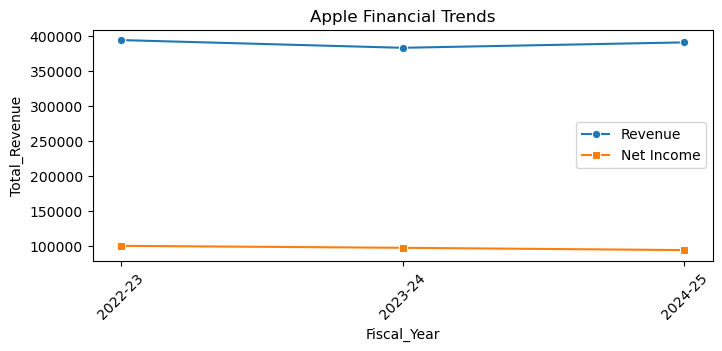

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.lineplot(data=apple_df, x="Fiscal_Year", y="Total_Revenue", marker="o", label="Revenue")
sns.lineplot(data=apple_df, x="Fiscal_Year", y="Net_Income", marker="s", label="Net Income")
plt.title("Apple Financial Trends")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 2. Tesla Analysis

In [30]:
tesla_df = df[df["Company"] == "Tesla"]

tesla_summary = tesla_df.agg({
    "Total_Revenue": ["mean", "median", "min", "max", "std"],
    "Net_Income": ["mean", "median", "min", "max", "std"],
    "Total_Assets": ["mean", "median", "min", "max"],
    "Total_Liabilities": ["mean", "median", "min", "max"],
    "Cash_Flow": ["mean", "median", "min", "max"]
})
tesla_summary

,Total_Revenue,Net_Income,Total_Assets,Total_Liabilities,Cash_Flow
mean,92255.333333,15150.333333,90372.333333,42917.333333,16497.0
median,94028.000000,15001.000000,90231.000000,42187.000000,16564.0
min,81462.000000,12556.000000,82343.000000,40953.000000,14724.0
max,101276.000000,17894.000000,98543.000000,45612.000000,18203.0
std,10025.238617,2672.131421,NaN,NaN,NaN


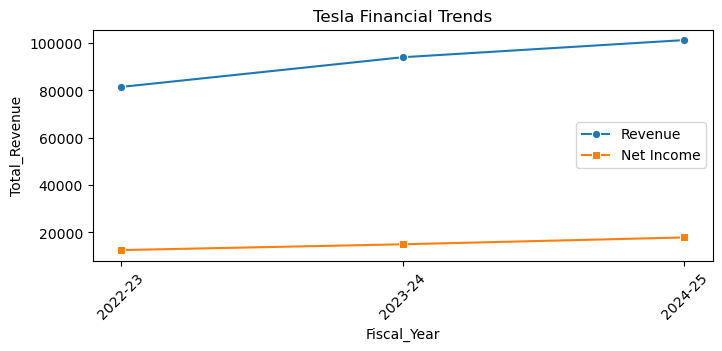

In [31]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=tesla_df, x="Fiscal_Year", y="Total_Revenue", marker="o", label="Revenue")
sns.lineplot(data=tesla_df, x="Fiscal_Year", y="Net_Income", marker="s", label="Net Income")
plt.title("Tesla Financial Trends")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 3. Microsoft Analysis

In [33]:
microsoft_df = df[df["Company"] == "Microsoft"]

microsoft_summary = microsoft_df.agg({
    "Total_Revenue": ["mean", "median", "min", "max", "std"],
    "Net_Income": ["mean", "median", "min", "max", "std"],
    "Total_Assets": ["mean", "median", "min", "max"],
    "Total_Liabilities": ["mean", "median", "min", "max"],
    "Cash_Flow": ["mean", "median", "min", "max"]
})
microsoft_summary

,Total_Revenue,Net_Income,Total_Assets,Total_Liabilities,Cash_Flow
mean,211730.000000,79044.333333,382212.333333,205541.666667,95685.666667
median,211540.000000,79105.000000,382125.000000,204876.000000,95678.000000
min,198270.000000,72738.000000,364840.000000,198320.000000,89034.000000
max,225380.000000,85290.000000,399672.000000,213429.000000,102345.000000
std,13555.998672,6276.219908,NaN,NaN,NaN


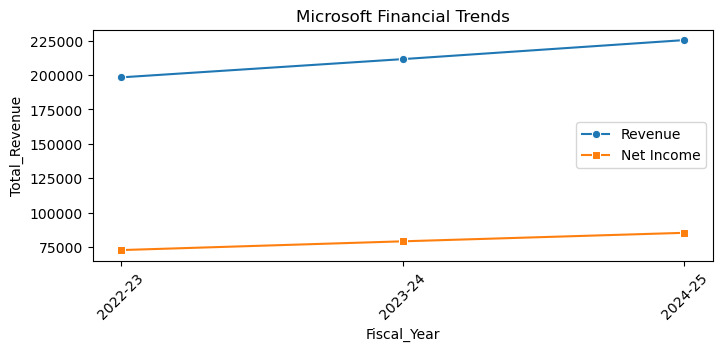

In [34]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=microsoft_df, x="Fiscal_Year", y="Total_Revenue", marker="o", label="Revenue")
sns.lineplot(data=microsoft_df, x="Fiscal_Year", y="Net_Income", marker="s", label="Net Income")
plt.title("Microsoft Financial Trends")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Interpretation of the Visuals

- **Revenue and Net Income Growth:** The line plots show how the revenue and net income change over the years for each company.
- **Profitability Ratios:** Higher Net Profit Margin suggests better efficiency.
- **Debt-to-Asset Ratio:** Helps understand financial leverage.
- **Cash Flow Efficiency:** Determines how well revenue converts to cash.

In [59]:
df
df.to_csv('modified_company_data.csv', index=False)